In [1]:
#import os, sys
#from google.colab import drive
#drive.mount('/content/drive')
#nb_path = '/content/notebooks'
#os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
#sys.path.insert(0,nb_path)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 72.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 109.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 42.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import  roc_curve, auc, roc_auc_score


In [6]:
#pip install --target=$nb_path ktrain

In [7]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2016/train.csv')

In [9]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,rt _hockey: it’s gold gbr rio2016 hockey @_gbh…,0.000,0.000,Neutral
1,1,amazing! congratulations winning modernpentath...,0.825,0.625,Positive
2,2,wait. ashton eaton won decathlon gold again? yas!,0.000,0.000,Neutral
3,3,got shivers watching end chloe esposito's race...,0.000,0.000,Neutral
4,4,celebrating gold! effort! congratulations! 👍💪🏅,0.000,0.000,Neutral


In [10]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2016/test.csv')

In [11]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,75000,add bitcoins goldira investingold buyinggold j...,0.0,0.0,Neutral
1,75001,"focus sports, goldira investingold buyinggold ...",0.0,0.0,Neutral
2,75002,'we're dreading going home goldira investingol...,0.0,0.0,Neutral
3,75003,cast silver bar ira rrsp acceptable. goldira i...,0.0,0.0,Neutral
4,75004,monetary works goldira investingold buyinggold...,0.0,0.0,Neutral


In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [13]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [14]:
len(X_train), len(X_test)

(75000, 7736)

In [15]:
y_test

['Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 '

In [16]:
# Building model with transformer
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name, maxlen=512)

In [17]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 15
	99percentile : 18


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 21


In [18]:
# getting distilbert model.
model = trans.get_classifier()

In [19]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

In [20]:
# learner.lr_find(show_plot=True, max_epochs=10)

In [21]:
history = learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
4688/4688 [==============================] - 575s 118ms/step - loss: 0.0971 - accuracy: 0.9681 - val_loss: 0.0733 - val_accuracy: 0.9818
Epoch 2/3
4688/4688 [==============================] - 566s 118ms/step - loss: 0.0296 - accuracy: 0.9930 - val_loss: 0.2523 - val_accuracy: 0.8877
Epoch 3/3
4688/4688 [==============================] - 566s 118ms/step - loss: 0.0102 - accuracy: 0.9976 - val_loss: 0.1545 - val_accuracy: 0.9674


In [22]:
learner

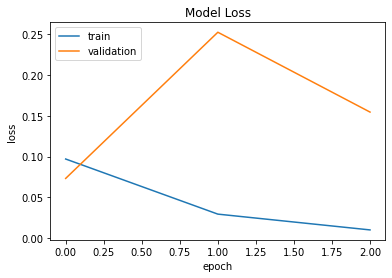

In [23]:
learner.plot('loss')

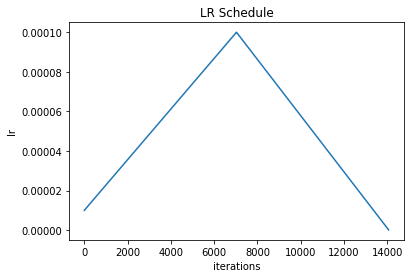

In [24]:
learner.plot('lr')

In [25]:
learner.validate()

242/242 [==============================] - 7s 25ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       757
           1       0.95      1.00      0.97      4099
           2       1.00      0.92      0.96      2880

    accuracy                           0.97      7736
   macro avg       0.97      0.97      0.97      7736
weighted avg       0.97      0.97      0.97      7736



array([[ 741,    6,   10],
       [   0, 4098,    1],
       [  16,  219, 2645]])